In [1]:
# prompt: import csv files from my google drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file
# Replace '/content/drive/My Drive/path/to/your/file.csv' with the full path to your file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/case study kelas work/train_house.csv')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


melihat 10 data teratas

In [2]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

mencari null values tiap kolom, jika null values lebih dari 40%, maka di drop

In [4]:
# prompt: to count null values per column

# Count null values per column
null_counts = df.isnull().sum()
df_null = null_counts.reset_index(name='Null Count').sort_values(by='Null Count', ascending=False)

In [5]:
df_null['persentase'] = (df_null['Null Count'] / len(df)) * 100

In [6]:
df_null[df_null['persentase']>40]['index']

,index
72,PoolQC
74,MiscFeature
6,Alley
73,Fence
25,MasVnrType
57,FireplaceQu


In [7]:
df.drop(columns=df_null[df_null['persentase']>40]['index'], inplace=True)

drop duplikat jika ada


In [8]:
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [9]:
df.drop_duplicates(inplace=True)

normalisasi dan transformasi tipe data perkolom`

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
for i in df.select_dtypes(include=['object']).columns :
  print(i)
  print(df[i].unique())
  print()

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']

Street
['Pave' 'Grvl']

LotShape
['Reg' 'IR1' 'IR2' 'IR3']

LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

Utilities
['AllPub' 'NoSeWa']

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope
['Gtl' 'Mod' 'Sev']

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' '

masih terdapat null values dalam jenis object aku mengisi dengan menggunakan modus per tiap kolom object, dan mean di tiap kolom selain object

In [12]:
df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)[0:10].reset_index()['index'].values.tolist()

['GarageCond',
 'GarageQual',
 'GarageFinish',
 'GarageType',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtQual',
 'Electrical']

In [13]:
for i in df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)[0:10].reset_index()['index'].values.tolist():
  df[i].fillna(df[i].mode()[0], inplace=True)

<ipython-input-13-943227a48f09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [14]:
df.select_dtypes(exclude=['object']).isnull().sum().sort_values(ascending=False)[0:3].reset_index()['index'].values.tolist()

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [15]:
for i in df.select_dtypes(exclude=['object']).isnull().sum().sort_values(ascending=False)[0:3].reset_index()['index'].values.tolist():
  df[i].fillna(df[i].mean(), inplace=True)

<ipython-input-15-09ada6e0ca5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

melakukan visualiasi

import library

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

versi categorical

<ipython-input-18-eb4249491c9b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')  # Membuat bar plot dengan seaborn


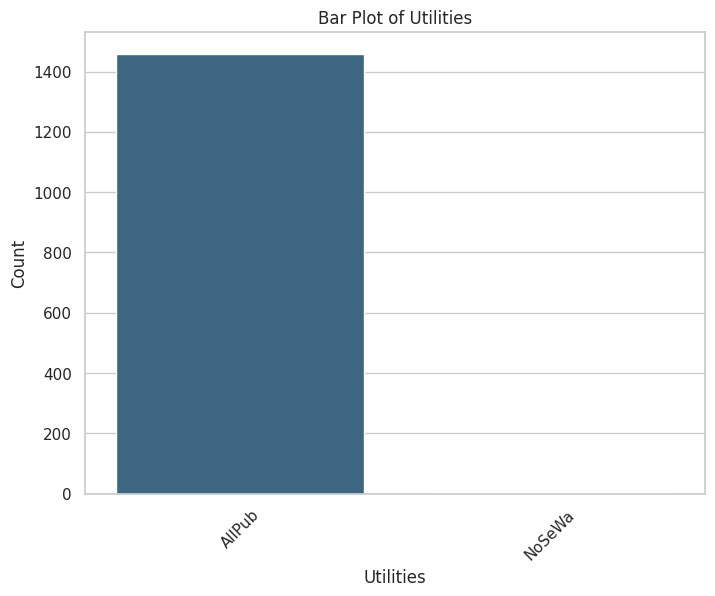

<ipython-input-18-eb4249491c9b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')  # Membuat bar plot dengan seaborn


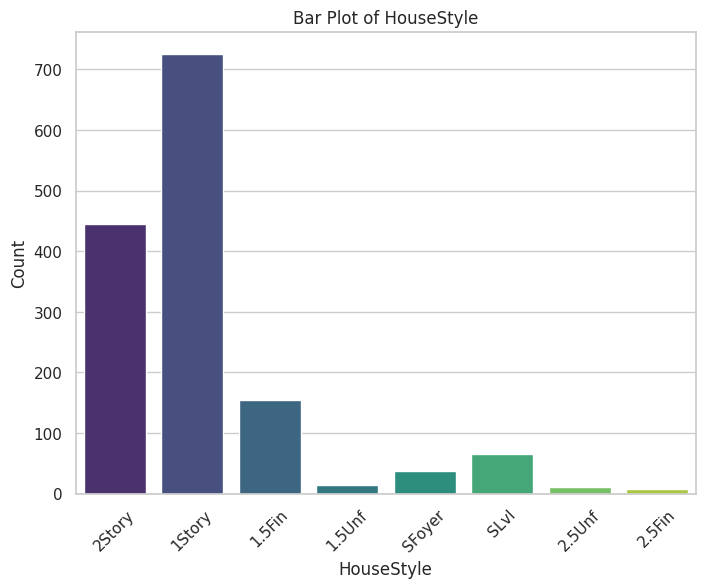

<ipython-input-18-eb4249491c9b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')  # Membuat bar plot dengan seaborn


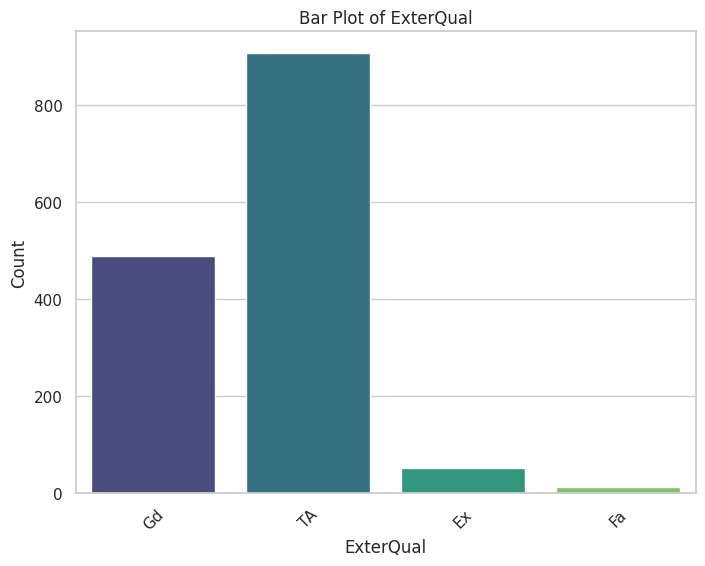

In [18]:
categorical_columns = ['Utilities', 'HouseStyle', 'ExterQual']

# Set gaya plot
sns.set(style="whitegrid")

# Loop untuk membuat bar plot untuk setiap kolom
for column in categorical_columns:
    plt.figure(figsize=(8, 6))  # Ukuran plot
    sns.countplot(data=df, x=column, palette='viridis')  # Membuat bar plot dengan seaborn
    plt.title(f'Bar Plot of {column}')  # Menambahkan judul
    plt.xlabel(column)  # Label sumbu x
    plt.ylabel('Count')  # Label sumbu y
    plt.xticks(rotation=45)  # Rotate labels jika diperlukan (misalnya jika label panjang)
    plt.show()


versi numerikal

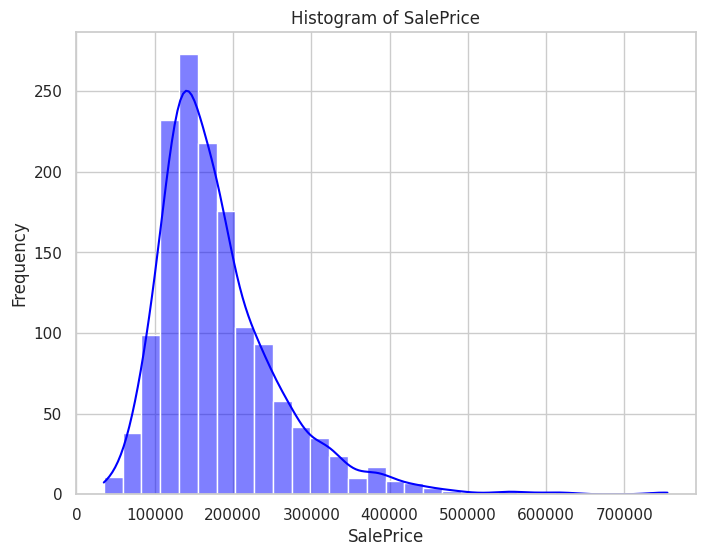

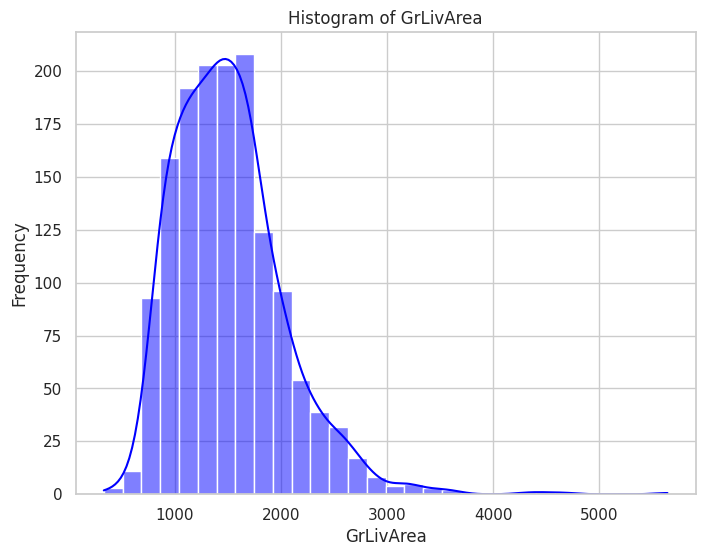

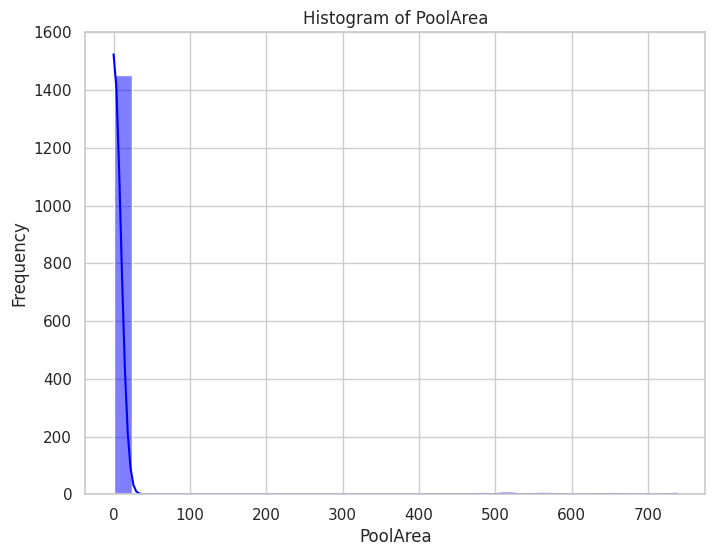

In [19]:
# List variabel numerikal yang akan diproses
numerical_columns = ['SalePrice', 'GrLivArea', 'PoolArea']

# Set gaya plot
sns.set(style="whitegrid")

# Loop untuk membuat histogram untuk setiap kolom
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Ukuran plot
    sns.histplot(df[column], kde=True, color='blue', bins=30)  # Membuat histogram dengan seaborn
    plt.title(f'Histogram of {column}')  # Menambahkan judul
    plt.xlabel(column)  # Label sumbu x
    plt.ylabel('Frequency')  # Label sumbu y
    plt.show()

menggunakan log-10 scale pada numerikal visualisasi

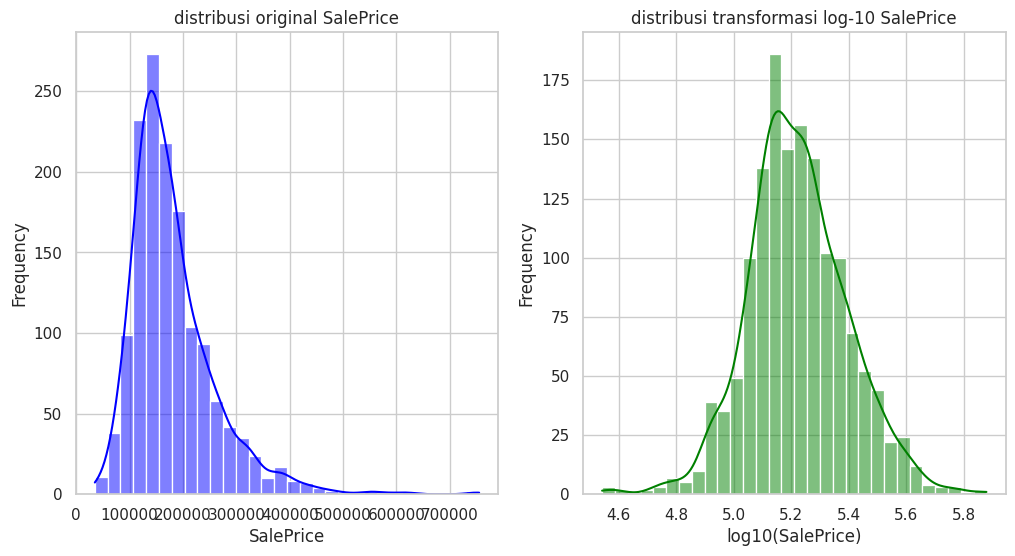

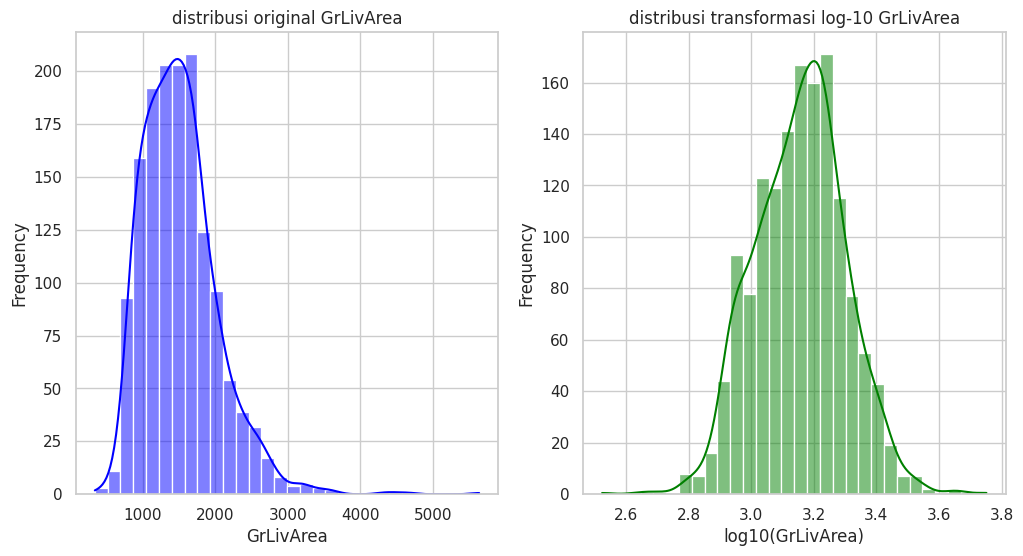

In [20]:
for i in numerical_columns:
  if (df[i] > 0).all():
    df[i + '_log'] = np.log10(df[i])

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True, color='blue', bins=30) # Change column to i
    plt.title(f'distribusi original {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(df[i + '_log'], kde=True, color='green', bins=30)
    plt.title(f'distribusi transformasi log-10 {i}')
    plt.xlabel(f'log10({i})')
    plt.ylabel('Frequency')

visualisasi scatterplot

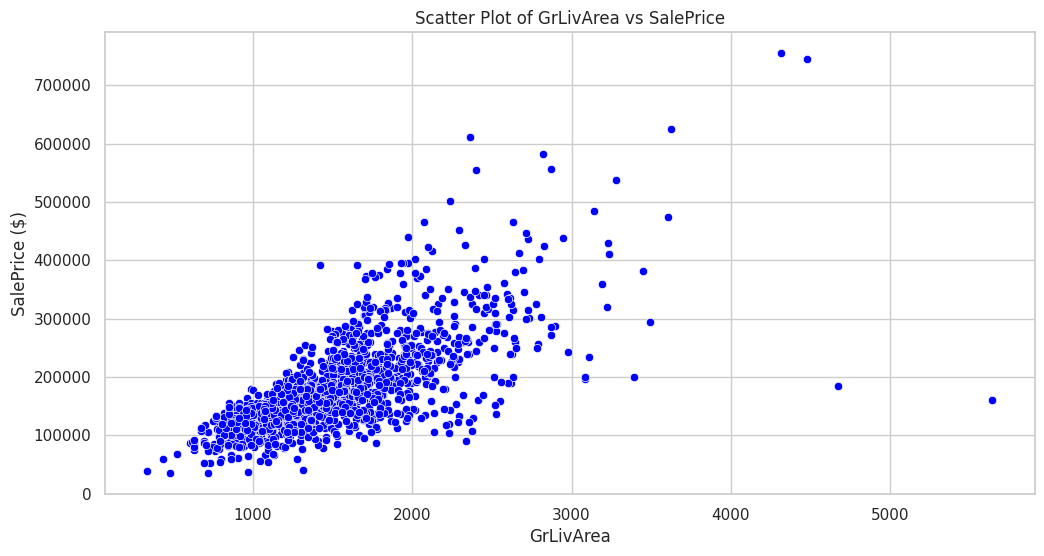

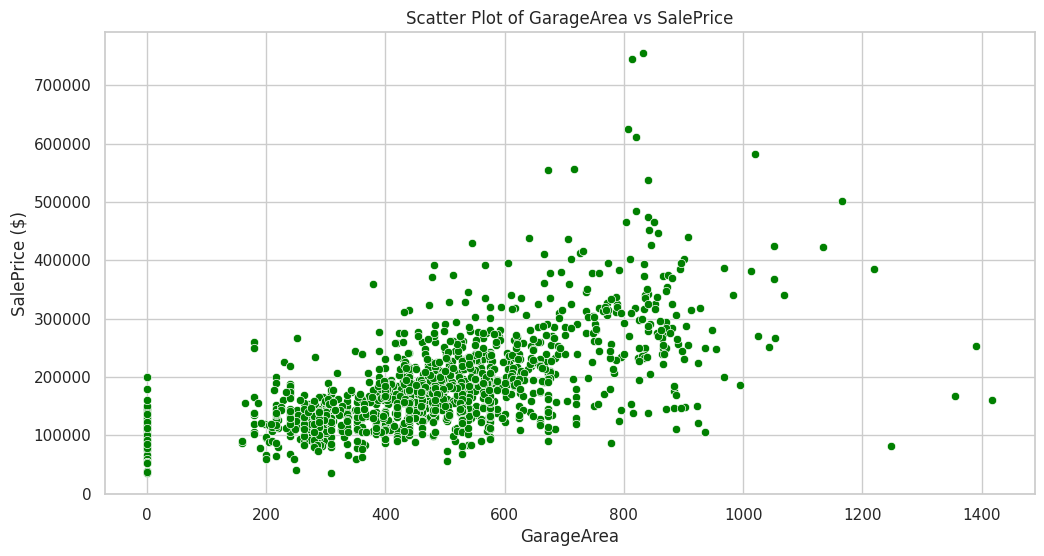

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', color='blue')
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice ($)')
plt.show()

# Membuat scatter plot untuk GarageArea vs SalePrice
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='GarageArea', y='SalePrice', color='green')
plt.title('Scatter Plot of GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice ($)')
plt.show()

In [27]:
import plotly.express as px

# Asumsi df adalah DataFrame kamu
corr_matrix = df[['GarageArea', 'SalePrice', 'GrLivArea']].corr()

# Membuat heatmap
fig = px.imshow(corr_matrix,
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.index,
                color_continuous_scale="Greys",
                text_auto = True)

# Menampilkan heatmap
fig.show()

In [ ]:
}